In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from figures import make_dataset

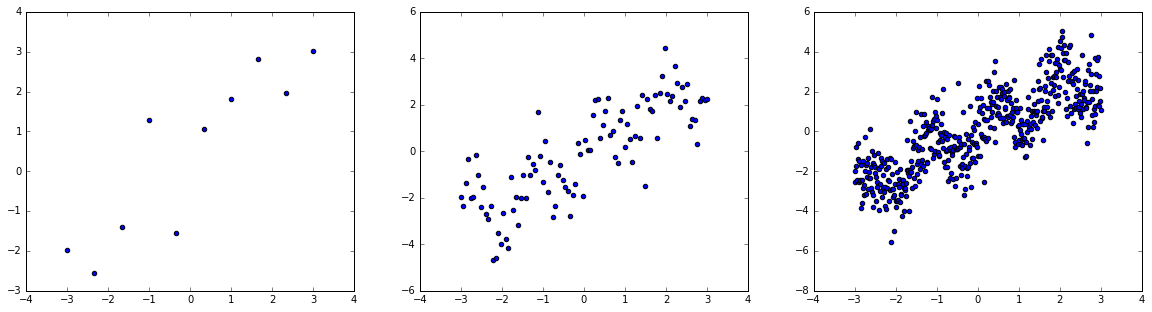

In [5]:
fig, axes = plt.subplots(1,3,figsize=(20,5))
for n_samples, ax in zip([10,100,500], axes.ravel()):
    X, y = make_dataset(n_samples=n_samples)
    ax.scatter(X,y)

In [10]:
from sklearn.learning_curve import learning_curve
from sklearn.cross_validation import KFold
from sklearn.linear_model import Ridge

from sklearn.datasets import load_boston

boston = load_boston()

cv = KFold(n_folds=10, n=len(boston.data), shuffle=True)

In [11]:
train_sizes, train_scores, validation_scores = \
learning_curve(Ridge(alpha=1), boston.data, boston.target, cv=cv)

In [12]:
boston.data.shape

(506, 13)

In [17]:
train_scores.shape

(5, 10)

In [24]:
def plot_learning_curve(train_sizes, train_scores, validation_scores):
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,\
                    train_scores_mean+train_scores_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,\
                    validation_scores_mean+validation_scores_std, alpha=0.1, color='g')
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="training score")
    plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="cross validation score")
    plt.ylim(max(-3, validation_scores_mean.min() - .1), train_scores_mean.max() + .1)

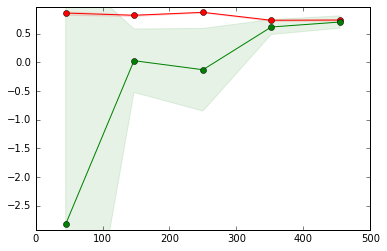

In [25]:
plot_learning_curve(train_sizes, train_scores, validation_scores)

In [26]:
train_sizes, train_scores, validation_scores = \
learning_curve(Ridge(alpha=0.001), boston.data, boston.target, cv=cv)

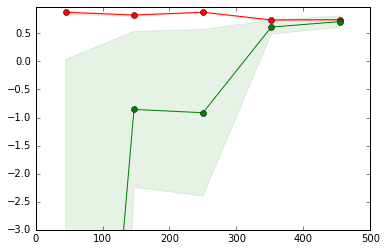

In [27]:
plot_learning_curve(train_sizes, train_scores, validation_scores)

In [33]:
np.mean(train_scores, axis=1)

array([ 0.87416285,  0.82604234,  0.87584836,  0.73831356,  0.74273007])

In [31]:
train_scores[0].mean()

0.87416284503290542

In [34]:
train_sizes

array([ 45, 147, 250, 352, 455])